# Using K-Means to find the best Player



This model can help us understand which players are similar to each other by position. Most players show similarities to 2-4 clusters. These clusters would most appropriately cluster the plyers by starters, or players that make a significant impact on the game from, role players, or solid contributers that may contribute many minutes, but may have lower stats, and the final clusters would represent specialty and reserve players. Organizations, fans, etc., can use this as a way to get a high level view of which players are great, good, and reserve.



In [26]:
#just a bit of the usual housekeeping

import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import numpy as np

%matplotlib inline

In [27]:
#reading in the data and doing some cleanup from the original format.
df = pd.read_csv("playertrain.csv")

In [28]:
df.head()

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PS/G
0,1,Alex Abrines\abrinal01,SG,23,OKC,16,0,12.6,1.4,4.1,...,0.909,0.1,0.8,0.9,0.4,0.3,0.1,0.8,0.9,4.3
1,2,Quincy Acy\acyqu01,PF,26,DAL,6,0,8.0,0.8,2.8,...,0.667,0.3,1.0,1.3,0.0,0.0,0.0,0.3,1.5,2.2
2,3,Steven Adams\adamsst01,C,23,OKC,22,22,30.2,4.3,7.7,...,0.754,2.8,4.9,7.7,0.6,1.2,0.9,1.9,2.5,10.8
3,4,Arron Afflalo\afflaar01,SG,31,SAC,20,18,25.8,2.9,6.9,...,0.917,0.3,2.3,2.5,1.2,0.4,0.1,0.2,1.6,8.1
4,5,Alexis Ajinca\ajincal01,C,28,NOP,11,1,13.0,1.9,4.1,...,0.800,1.0,2.7,3.7,0.1,0.1,0.6,0.5,1.9,4.2


In [29]:
print df.columns

Index([u'Rk', u'Player', u'Pos', u'Age', u'Tm', u'G', u'GS', u'MP', u'FG',
       u'FGA', u'FG%', u'3P', u'3PA', u'3P%', u'2P', u'2PA', u'2P%', u'eFG%',
       u'FT', u'FTA', u'FT%', u'ORB', u'DRB', u'TRB', u'AST', u'STL', u'BLK',
       u'TOV', u'PF', u'PS/G'],
      dtype='object')


In [30]:
XPG = df[df['Pos']=='PG']

In [31]:
XSG = df[df['Pos']=='SG']

In [32]:
XSF = df[df['Pos']=='SF']

In [33]:
XPF = df[df['Pos']=='PF']

In [34]:
XC = df[df['Pos']=='C']

In [35]:
XPG

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PS/G
20,21,D.J. Augustin\augusdj01,PG,29,ORL,23,7,20.2,3.2,7.5,...,0.830,0.1,1.2,1.3,2.9,0.3,0.0,1.3,1.4,9.6
23,24,Wade Baldwin\baldwwa01,PG,20,MEM,17,1,16.5,1.5,4.6,...,0.792,0.4,1.4,1.8,2.6,0.7,0.3,1.5,1.6,4.2
25,26,J.J. Barea\bareajo01,PG,32,DAL,9,5,33.1,5.7,13.7,...,0.964,0.4,3.0,3.4,5.4,0.7,0.1,2.0,0.9,16.3
31,32,Jerryd Bayless\bayleje01,PG,28,PHI,3,1,23.7,3.7,10.7,...,0.900,1.0,3.0,4.0,4.3,0.0,0.0,3.0,1.3,11.0
46,47,Eric Bledsoe\bledser01,PG,27,PHO,22,22,31.9,6.5,14.7,...,0.815,1.0,4.8,5.8,5.0,1.5,0.3,3.1,3.0,18.8
55,56,Aaron Brooks\brookaa01,PG,32,IND,19,0,15.0,2.3,5.5,...,0.857,0.3,0.7,1.0,2.2,0.6,0.2,1.4,1.6,6.1
57,58,Bobby Brown\brownbo02,PG,32,HOU,6,0,3.7,0.2,2.0,...,NaN,0.0,0.3,0.3,0.0,0.0,0.0,0.2,0.3,0.3
61,62,Trey Burke\burketr01,PG,24,WAS,17,0,11.6,2.1,4.6,...,0.500,0.2,0.4,0.5,1.4,0.2,0.1,0.5,0.6,4.6
64,65,Jose Calderon\caldejo01,PG,35,LAL,14,9,13.9,1.9,3.9,...,1.000,0.4,1.8,2.2,2.6,0.4,0.1,1.6,1.1,4.7
70,71,Michael Carter-Williams\cartemi01,PG,25,CHI,3,0,15.0,1.3,5.0,...,0.750,1.0,2.0,3.0,2.7,0.7,0.7,2.0,2.0,4.0


In [36]:
XSG

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PS/G
0,1,Alex Abrines\abrinal01,SG,23,OKC,16,0,12.6,1.4,4.1,...,0.909,0.1,0.8,0.9,0.4,0.3,0.1,0.8,0.9,4.3
3,4,Arron Afflalo\afflaar01,SG,31,SAC,20,18,25.8,2.9,6.9,...,0.917,0.3,2.3,2.5,1.2,0.4,0.1,0.2,1.6,8.1
8,9,Tony Allen\allento01,SG,35,MEM,17,15,25.6,3.8,8.3,...,0.676,2.2,3.1,5.3,0.9,1.8,0.5,1.4,2.7,9.1
13,14,Kyle Anderson\anderky01,SG,23,SAS,20,7,13.8,0.9,2.1,...,0.833,0.5,2.4,2.8,0.9,0.6,0.3,0.4,0.7,2.6
15,16,Giannis Antetokounmpo\antetgi01,SG,22,MIL,20,20,34.5,8.0,15.4,...,0.773,1.6,7.3,8.9,6.1,2.2,2.3,3.4,3.8,22.0
22,23,Ron Baker\bakerro01,SG,23,NYK,6,0,7.3,1.0,3.3,...,0.500,0.2,0.3,0.5,0.5,0.5,0.2,0.3,0.2,2.8
24,25,Leandro Barbosa\barbole01,SG,34,PHO,21,0,12.6,2.4,5.0,...,0.857,0.2,1.2,1.4,1.1,0.4,0.0,0.2,1.0,5.5
28,29,Will Barton\bartowi01,SG,26,DEN,11,11,32.1,5.2,12.4,...,0.690,1.4,3.8,5.2,2.5,0.9,0.5,2.1,2.1,14.3
30,31,Nicolas Batum\batumni01,SG,28,CHO,21,21,34.8,4.4,11.4,...,0.788,0.7,7.0,7.7,5.5,1.0,0.4,2.3,1.6,13.5
34,35,Bradley Beal\bealbr01,SG,23,WAS,18,18,34.8,7.6,16.9,...,0.780,0.8,2.3,3.1,3.1,0.9,0.4,1.8,2.2,21.6


In [37]:
XSF

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PS/G
9,10,Al-Farouq Aminu\aminual01,SF,26,POR,11,8,24.4,1.9,7.2,...,0.476,0.9,5.5,6.5,1.7,1.4,0.7,1.5,1.4,5.5
11,12,Alan Anderson\anderal01,SF,34,LAC,3,0,9.3,0.7,2.7,...,NaN,0.7,0.3,1.0,0.7,0.0,0.0,0.3,1.7,2.0
12,13,Justin Anderson\anderju01,SF,23,DAL,21,2,19.9,2.7,7.2,...,0.765,1.2,2.7,3.9,0.9,0.8,0.5,1.2,1.7,8.0
16,17,Carmelo Anthony\anthoca01,SF,32,NYK,22,22,33.7,8.2,18.9,...,0.867,1.0,5.0,6.0,2.5,1.0,0.4,1.9,2.9,22.4
17,18,Trevor Ariza\arizatr01,SF,31,HOU,22,22,33.4,4.5,10.1,...,0.792,0.8,4.2,5.0,2.0,2.0,0.3,0.9,1.7,12.6
21,22,Luke Babbitt\babbilu01,SF,27,MIA,19,11,15.9,1.5,4.4,...,0.714,0.3,1.6,1.8,0.5,0.4,0.1,0.4,1.2,4.2
26,27,Harrison Barnes\barneha02,SF,24,DAL,21,21,37.3,8.2,18.1,...,0.877,1.5,4.2,5.7,1.2,0.8,0.2,1.5,1.8,20.4
27,28,Matt Barnes\barnema02,SF,36,SAC,21,4,25.5,2.6,7.1,...,0.760,1.0,3.9,4.9,2.8,0.8,0.4,1.8,2.6,7.2
33,34,Kent Bazemore\bazemke01,SF,27,ATL,22,22,27.0,4.0,11.0,...,0.795,0.6,2.6,3.2,2.6,1.6,0.6,1.9,2.3,10.7
36,37,Michael Beasley\beaslmi01,SF,28,MIL,20,0,15.9,3.6,6.8,...,0.686,0.7,2.9,3.6,0.8,0.5,0.2,1.2,1.6,8.6


In [38]:
XPF

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PS/G
1,2,Quincy Acy\acyqu01,PF,26,DAL,6,0,8.0,0.8,2.8,...,0.667,0.3,1.0,1.3,0.0,0.0,0.0,0.3,1.5,2.2
6,7,LaMarcus Aldridge\aldrila01,PF,31,SAS,21,21,32.9,6.5,13.9,...,0.810,1.8,4.7,6.5,1.7,0.8,1.1,1.5,2.2,16.7
7,8,Lavoy Allen\allenla01,PF,27,IND,21,0,14.6,0.8,2.5,...,0.667,1.3,1.5,2.8,1.2,0.3,0.3,0.3,1.3,1.8
14,15,Ryan Anderson\anderry01,PF,28,HOU,22,22,30.7,4.3,10.7,...,0.907,1.8,3.6,5.4,1.1,0.4,0.1,1.0,1.9,12.9
18,19,Darrell Arthur\arthuda01,PF,28,DEN,10,1,14.7,2.0,4.5,...,1.000,0.4,1.9,2.3,1.1,0.2,0.3,1.2,2.1,5.3
29,30,Brandon Bass\bassbr01,PF,31,LAC,12,0,8.9,1.5,2.8,...,1.000,0.5,0.9,1.4,0.4,0.1,0.2,0.3,0.8,3.6
39,40,Dragan Bender\bendedr01,PF,19,PHO,17,0,12.1,1.2,3.0,...,0.000,0.2,1.4,1.6,0.4,0.2,0.4,0.7,1.2,3.0
40,41,Anthony Bennett\bennean01,PF,23,BRK,14,1,10.6,1.7,3.9,...,0.650,1.0,2.2,3.2,0.6,0.3,0.0,0.4,0.6,5.0
41,42,Davis Bertans\bertada01,PF,24,SAS,18,1,10.9,1.2,2.6,...,0.667,0.3,0.8,1.1,0.4,0.1,0.5,0.3,1.0,3.4
44,45,Nemanja Bjelica\bjeline01,PF,28,MIN,22,1,16.8,2.5,5.8,...,0.750,0.5,2.8,3.3,1.1,0.7,0.3,1.0,2.0,7.0


In [39]:
XC

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PS/G
2,3,Steven Adams\adamsst01,C,23,OKC,22,22,30.2,4.3,7.7,...,0.754,2.8,4.9,7.7,0.6,1.2,0.9,1.9,2.5,10.8
4,5,Alexis Ajinca\ajincal01,C,28,NOP,11,1,13.0,1.9,4.1,...,0.800,1.0,2.7,3.7,0.1,0.1,0.6,0.5,1.9,4.2
5,6,Cole Aldrich\aldrico01,C,28,MIN,22,0,13.0,1.3,2.3,...,0.692,1.3,2.7,4.0,0.5,0.7,0.6,0.3,2.0,3.0
10,11,Chris Andersen\anderch01,C,38,CLE,9,0,8.8,0.8,2.0,...,0.667,0.9,1.7,2.6,0.6,0.3,0.4,0.6,1.3,2.4
19,20,Omer Asik\asikom01,C,30,NOP,23,18,18.0,1.3,2.6,...,0.583,1.7,4.6,6.3,0.6,0.2,0.3,0.5,1.7,3.6
32,33,Aron Baynes\baynear01,C,30,DET,24,1,16.5,1.6,3.7,...,0.872,1.1,3.3,4.4,0.4,0.4,0.4,1.1,2.1,4.6
43,44,Bismack Biyombo\biyombi01,C,24,ORL,22,7,25.8,1.9,4.1,...,0.500,2.4,6.0,8.4,1.1,0.2,1.4,1.5,2.6,5.5
45,46,Tarik Black\blackta01,C,25,LAL,23,0,15.4,2.2,4.4,...,0.786,2.3,2.9,5.2,0.6,0.3,0.6,0.7,2.4,5.9
48,49,Andrew Bogut\bogutan01,C,32,DAL,16,16,25.0,1.8,3.8,...,0.273,2.6,7.8,10.4,2.2,0.6,0.9,1.8,3.6,3.8
67,68,Clint Capela\capelca01,C,22,HOU,22,22,25.8,5.5,8.8,...,0.457,2.5,6.0,8.5,0.9,0.5,1.9,1.3,2.6,12.0


In [40]:
XPG = XPG.drop(['Player','Pos','Tm'], axis=1)
XSG = XSG.drop(['Player','Pos','Tm'], axis=1)
XSF = XSF.drop(['Player','Pos','Tm'], axis=1)
XPF = XPF.drop(['Player','Pos','Tm'], axis=1)
XC = XC.drop(['Player','Pos','Tm'], axis=1)

In [48]:
print df.columns

Index([u'Rk', u'Player', u'Pos', u'Age', u'Tm', u'G', u'GS', u'MP', u'FG',
       u'FGA', u'FG%', u'3P', u'3PA', u'3P%', u'2P', u'2PA', u'2P%', u'eFG%',
       u'FT', u'FTA', u'FT%', u'ORB', u'DRB', u'TRB', u'AST', u'STL', u'BLK',
       u'TOV', u'PF', u'PS/G'],
      dtype='object')


In [49]:
XPG.rename(columns={'FG%': 'FGP'},inplace=True)
XPG.rename(columns={'3P%': '3PP'},inplace=True)
XPG.rename(columns={'2P%': '2PP'},inplace=True)
XPG.rename(columns={'eFG%': 'EFGP'},inplace=True)
XPG.rename(columns={'FT%': 'FTP'},inplace=True)
XPG.rename(columns={'PS/G': 'PPG'},inplace=True)

XSG.rename(columns={'FG%': 'FGP'},inplace=True)
XSG.rename(columns={'3P%': '3PP'},inplace=True)
XSG.rename(columns={'2P%': '2PP'},inplace=True)
XSG.rename(columns={'eFG%': 'EFGP'},inplace=True)
XSG.rename(columns={'FT%': 'FTP'},inplace=True)
XSG.rename(columns={'PS/G': 'PPG'},inplace=True)

XSF.rename(columns={'FG%': 'FGP'},inplace=True)
XSF.rename(columns={'3P%': '3PP'},inplace=True)
XSF.rename(columns={'2P%': '2PP'},inplace=True)
XSF.rename(columns={'eFG%': 'EFGP'},inplace=True)
XSF.rename(columns={'FT%': 'FTP'},inplace=True)
XSF.rename(columns={'PS/G': 'PPG'},inplace=True)

XPF.rename(columns={'FG%': 'FGP'},inplace=True)
XPF.rename(columns={'3P%': '3PP'},inplace=True)
XPF.rename(columns={'2P%': '2PP'},inplace=True)
XPF.rename(columns={'eFG%': 'EFGP'},inplace=True)
XPF.rename(columns={'FT%': 'FTP'},inplace=True)
XPF.rename(columns={'PS/G': 'PPG'},inplace=True)

XC.rename(columns={'FG%': 'FGP'},inplace=True)
XC.rename(columns={'3P%': '3PP'},inplace=True)
XC.rename(columns={'2P%': '2PP'},inplace=True)
XC.rename(columns={'eFG%': 'EFGP'},inplace=True)
XC.rename(columns={'FT%': 'FTP'},inplace=True)
XC.rename(columns={'PS/G': 'PPG'},inplace=True)

In [52]:
#See how many null values are in all the columns. Since NULL values in sports would just indicate that the player does not have any stats in this category, we can fill all the NaN values with zero.
XPG.fillna(0, inplace=True)
XSG.fillna(0, inplace=True)
XSF.fillna(0, inplace=True)
XPF.fillna(0, inplace=True)
XC.fillna(0, inplace=True)

In [53]:
XPG

,Rk,Age,G,GS,MP,FG,FGA,FGP,3P,3PA,...,FTP,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PPG
20,21,29,23,7,20.2,3.2,7.5,0.424,1.5,4.0,...,0.830,0.1,1.2,1.3,2.9,0.3,0.0,1.3,1.4,9.6
23,24,20,17,1,16.5,1.5,4.6,0.316,0.1,0.9,...,0.792,0.4,1.4,1.8,2.6,0.7,0.3,1.5,1.6,4.2
25,26,32,9,5,33.1,5.7,13.7,0.415,2.0,5.2,...,0.964,0.4,3.0,3.4,5.4,0.7,0.1,2.0,0.9,16.3
31,32,28,3,1,23.7,3.7,10.7,0.344,0.7,1.7,...,0.900,1.0,3.0,4.0,4.3,0.0,0.0,3.0,1.3,11.0
46,47,27,22,22,31.9,6.5,14.7,0.443,1.2,4.1,...,0.815,1.0,4.8,5.8,5.0,1.5,0.3,3.1,3.0,18.8
55,56,32,19,0,15.0,2.3,5.5,0.423,0.8,2.3,...,0.857,0.3,0.7,1.0,2.2,0.6,0.2,1.4,1.6,6.1
57,58,32,6,0,3.7,0.2,2.0,0.083,0.0,0.7,...,0.000,0.0,0.3,0.3,0.0,0.0,0.0,0.2,0.3,0.3
61,62,24,17,0,11.6,2.1,4.6,0.443,0.3,0.7,...,0.500,0.2,0.4,0.5,1.4,0.2,0.1,0.5,0.6,4.6
64,65,35,14,9,13.9,1.9,3.9,0.481,0.7,1.7,...,1.000,0.4,1.8,2.2,2.6,0.4,0.1,1.6,1.1,4.7
70,71,25,3,0,15.0,1.3,5.0,0.267,0.3,0.7,...,0.750,1.0,2.0,3.0,2.7,0.7,0.7,2.0,2.0,4.0


In [55]:
#feature scaling
scaler = StandardScaler()
XPG_scaled = scaler.fit_transform(XPG)

In [57]:
XPG_scaled

array([[ -1.67622379e+00,   5.02825047e-01,   1.01985714e+00, ...,
         -3.56248566e-01,  -2.55159065e-01,  -2.70577345e-02],
       [ -1.65226674e+00,  -1.74633849e+00,   1.33489155e-01, ...,
         -1.78659191e-01,  -1.52789859e-03,  -7.53241963e-01],
       [ -1.63629537e+00,   1.25254623e+00,  -1.04833483e+00, ...,
          2.65314247e-01,  -8.89236982e-01,   8.73948623e-01],
       ..., 
       [  1.47812112e+00,  -1.49643143e+00,   1.33489155e-01, ...,
          4.42903622e-01,   1.13981235e+00,  -4.84284842e-01],
       [  1.51804953e+00,   1.25254623e+00,  -4.57422838e-01, ...,
          6.20492997e-01,   1.01299677e+00,   2.82242955e-01],
       [  1.60589205e+00,  -7.46710250e-01,  -1.61966841e-01, ...,
         -1.42178482e+00,  -1.65013048e+00,  -8.74272668e-01]])

##Finding K!

I'm going to use this code to measure the average distortion, for a variety of cluster sizes.  This function is a little tricky, don't worry, it won't be on a test!  You're certainly free to reuse it in your own work though.

In [58]:
def find_k (XPG, k_range, sample_percent=1):
    """
    k_range: a list of possible k values
    X, the data we're clustering on
    """
    from sklearn.cluster import KMeans
    import matplotlib.pyplot as plt
    import numpy as np
    from scipy.spatial.distance import cdist
    from sklearn.metrics import pairwise_distances

    N = XPG.shape[0]
    sampleSize = XPG.shape[0] * sample_percent

    if sampleSize > 0:
        index = np.arange(np.shape(XPG)[0])
        np.random.shuffle(index)
        XPG =  XPG[index, :]


    mean_distortions=[]
    for k in k_range:
        #cluster using k, then calculate the mean distortion (average distance to closest centroid)
        kmeans_model = KMeans(n_clusters=k, init='k-means++', n_jobs=-1).fit(XPG)
        mean_distortions.append(sum(np.min(pairwise_distances(XPG, kmeans_model.cluster_centers_,
                                                              metric='euclidean'),axis=1)) / XPG.shape[0])


    #visualize results
    plt.plot(k_range, mean_distortions)
    plt.xlabel("K Value")
    plt.ylabel("Mean Distortion")
    plt.title("Elbow Graph for Mean Distortion per K")
    plt.show()

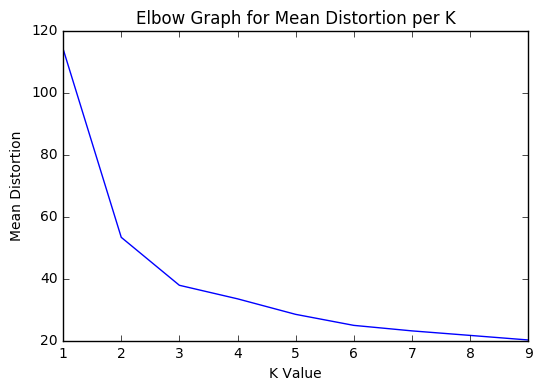

In [59]:
find_k(np.matrix(XPG), range(1,10),1)

From above, it appears that either 2 or 3 would be a good number of clusters.  

In this case, we will divide this into 3 clusters to give us a better understanding of who is a starter type of player, major role player, and bench player    

In [63]:
kmeans_model = KMeans(n_clusters=3, random_state=42)
kmeans_model.fit(XPG_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=42, tol=0.0001, verbose=0)

In [64]:
XPG['labels'] = kmeans_model.labels_

In [65]:
XPG.head(16)

,Rk,Age,G,GS,MP,FG,FGA,FGP,3P,3PA,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PPG,labels
20,21,29,23,7,20.2,3.2,7.5,0.424,1.5,4.0,...,0.1,1.2,1.3,2.9,0.3,0.0,1.3,1.4,9.6,1
23,24,20,17,1,16.5,1.5,4.6,0.316,0.1,0.9,...,0.4,1.4,1.8,2.6,0.7,0.3,1.5,1.6,4.2,2
25,26,32,9,5,33.1,5.7,13.7,0.415,2.0,5.2,...,0.4,3.0,3.4,5.4,0.7,0.1,2.0,0.9,16.3,1
31,32,28,3,1,23.7,3.7,10.7,0.344,0.7,1.7,...,1.0,3.0,4.0,4.3,0.0,0.0,3.0,1.3,11.0,1
46,47,27,22,22,31.9,6.5,14.7,0.443,1.2,4.1,...,1.0,4.8,5.8,5.0,1.5,0.3,3.1,3.0,18.8,0
55,56,32,19,0,15.0,2.3,5.5,0.423,0.8,2.3,...,0.3,0.7,1.0,2.2,0.6,0.2,1.4,1.6,6.1,2
57,58,32,6,0,3.7,0.2,2.0,0.083,0.0,0.7,...,0.0,0.3,0.3,0.0,0.0,0.0,0.2,0.3,0.3,2
61,62,24,17,0,11.6,2.1,4.6,0.443,0.3,0.7,...,0.2,0.4,0.5,1.4,0.2,0.1,0.5,0.6,4.6,2
64,65,35,14,9,13.9,1.9,3.9,0.481,0.7,1.7,...,0.4,1.8,2.2,2.6,0.4,0.1,1.6,1.1,4.7,2
70,71,25,3,0,15.0,1.3,5.0,0.267,0.3,0.7,...,1.0,2.0,3.0,2.7,0.7,0.7,2.0,2.0,4.0,2


In [66]:
XPG[XPG['labels'] == 3]

,Rk,Age,G,GS,MP,FG,FGA,FGP,3P,3PA,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PPG,labels


In [67]:
XPG

,Rk,Age,G,GS,MP,FG,FGA,FGP,3P,3PA,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PPG,labels
20,21,29,23,7,20.2,3.2,7.5,0.424,1.5,4.0,...,0.1,1.2,1.3,2.9,0.3,0.0,1.3,1.4,9.6,1
23,24,20,17,1,16.5,1.5,4.6,0.316,0.1,0.9,...,0.4,1.4,1.8,2.6,0.7,0.3,1.5,1.6,4.2,2
25,26,32,9,5,33.1,5.7,13.7,0.415,2.0,5.2,...,0.4,3.0,3.4,5.4,0.7,0.1,2.0,0.9,16.3,1
31,32,28,3,1,23.7,3.7,10.7,0.344,0.7,1.7,...,1.0,3.0,4.0,4.3,0.0,0.0,3.0,1.3,11.0,1
46,47,27,22,22,31.9,6.5,14.7,0.443,1.2,4.1,...,1.0,4.8,5.8,5.0,1.5,0.3,3.1,3.0,18.8,0
55,56,32,19,0,15.0,2.3,5.5,0.423,0.8,2.3,...,0.3,0.7,1.0,2.2,0.6,0.2,1.4,1.6,6.1,2
57,58,32,6,0,3.7,0.2,2.0,0.083,0.0,0.7,...,0.0,0.3,0.3,0.0,0.0,0.0,0.2,0.3,0.3,2
61,62,24,17,0,11.6,2.1,4.6,0.443,0.3,0.7,...,0.2,0.4,0.5,1.4,0.2,0.1,0.5,0.6,4.6,2
64,65,35,14,9,13.9,1.9,3.9,0.481,0.7,1.7,...,0.4,1.8,2.2,2.6,0.4,0.1,1.6,1.1,4.7,2
70,71,25,3,0,15.0,1.3,5.0,0.267,0.3,0.7,...,1.0,2.0,3.0,2.7,0.7,0.7,2.0,2.0,4.0,2


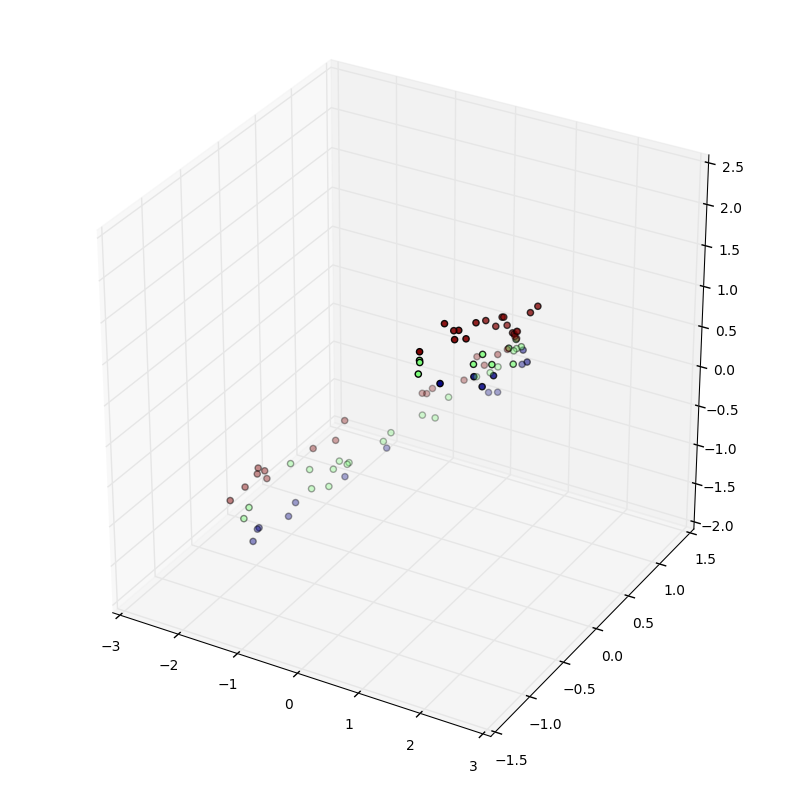

In [73]:
from sklearn.manifold import TSNE
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

model = TSNE(n_components=3, learning_rate=12, random_state=10)
X_tsne = model.fit_transform(XPG) 
plt.figure(figsize=(10,10))
ax = plt.subplot(111, projection='3d')
ax.scatter(X_tsne[:, 0], X_tsne[:, 1],X_tsne[:,2], c=kmeans_model.labels_)

In [74]:
#feature scaling
scaler = StandardScaler()
XSG_scaled = scaler.fit_transform(XSG)

In [75]:
XSG_scaled

array([[-1.65003851, -0.74746769, -0.05781109, ..., -0.28277845,
        -0.76602596, -0.75459146],
       [-1.62675741,  1.06620766,  0.54105255, ..., -1.05818   ,
         0.06717458, -0.12799647],
       [-1.58795557,  1.97304533,  0.09190482, ...,  0.4926231 ,
         1.37648973,  0.03689694],
       ..., 
       [ 1.62483653,  0.83949824,  1.13991619, ...,  1.65572542,
        -0.64699731,  1.61987374],
       [ 1.68691946, -1.20088652, -0.80639065, ..., -1.1874136 ,
        -1.59922651, -1.24927171],
       [ 1.7024402 ,  1.06620766,  0.24162073, ..., -0.41201205,
         1.37648973,  0.72944929]])

##Finding K!

I'm going to use this code to measure the average distortion, for a variety of cluster sizes.  This function is a little tricky, don't worry, it won't be on a test!  You're certainly free to reuse it in your own work though.

In [76]:
def find_k (XSG, k_range, sample_percent=1):
    """
    k_range: a list of possible k values
    X, the data we're clustering on
    """
    from sklearn.cluster import KMeans
    import matplotlib.pyplot as plt
    import numpy as np
    from scipy.spatial.distance import cdist
    from sklearn.metrics import pairwise_distances

    N = XSG.shape[0]
    sampleSize = XSG.shape[0] * sample_percent

    if sampleSize > 0:
        index = np.arange(np.shape(XSG)[0])
        np.random.shuffle(index)
        XSG =  XSG[index, :]


    mean_distortions=[]
    for k in k_range:
        #cluster using k, then calculate the mean distortion (average distance to closest centroid)
        kmeans_model = KMeans(n_clusters=k, init='k-means++', n_jobs=-1).fit(XSG)
        mean_distortions.append(sum(np.min(pairwise_distances(XSG, kmeans_model.cluster_centers_,
                                                              metric='euclidean'),axis=1)) / XSG.shape[0])


    #visualize results
    plt.plot(k_range, mean_distortions)
    plt.xlabel("K Value")
    plt.ylabel("Mean Distortion")
    plt.title("Elbow Graph for Mean Distortion per K")
    plt.show()

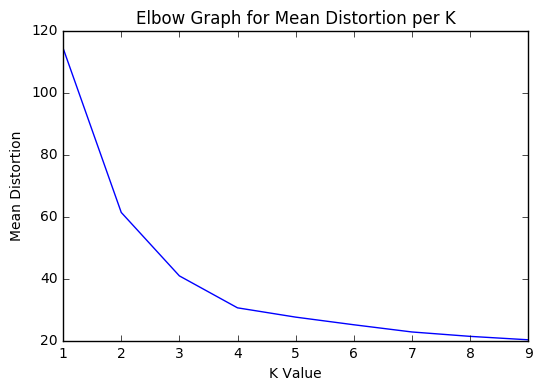

In [77]:
find_k(np.matrix(XSG), range(1,10),1)

From above, it appears that either 2,3 or 4 would be a good number of clusters.  

In this case, we will divide this into 4 clusters to give us a better understanding of who is a starter type of player, major role player, bench player, and reserve    

In [78]:
kmeans_model = KMeans(n_clusters=4, random_state=42)
kmeans_model.fit(XSG_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=42, tol=0.0001, verbose=0)

In [79]:
XSG['labels'] = kmeans_model.labels_

In [80]:
XSG.head(16)

,Rk,Age,G,GS,MP,FG,FGA,FGP,3P,3PA,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PPG,labels
0,1,23,16,0,12.6,1.4,4.1,0.354,0.8,2.8,...,0.1,0.8,0.9,0.4,0.3,0.1,0.8,0.9,4.3,2
3,4,31,20,18,25.8,2.9,6.9,0.420,0.7,2.0,...,0.3,2.3,2.5,1.2,0.4,0.1,0.2,1.6,8.1,1
8,9,35,17,15,25.6,3.8,8.3,0.461,0.1,0.7,...,2.2,3.1,5.3,0.9,1.8,0.5,1.4,2.7,9.1,0
13,14,23,20,7,13.8,0.9,2.1,0.429,0.3,0.6,...,0.5,2.4,2.8,0.9,0.6,0.3,0.4,0.7,2.6,2
15,16,22,20,20,34.5,8.0,15.4,0.519,0.6,2.3,...,1.6,7.3,8.9,6.1,2.2,2.3,3.4,3.8,22.0,0
22,23,23,6,0,7.3,1.0,3.3,0.300,0.5,1.8,...,0.2,0.3,0.5,0.5,0.5,0.2,0.3,0.2,2.8,2
24,25,34,21,0,12.6,2.4,5.0,0.472,0.4,1.1,...,0.2,1.2,1.4,1.1,0.4,0.0,0.2,1.0,5.5,2
28,29,26,11,11,32.1,5.2,12.4,0.419,1.3,3.8,...,1.4,3.8,5.2,2.5,0.9,0.5,2.1,2.1,14.3,0
30,31,28,21,21,34.8,4.4,11.4,0.383,1.7,5.5,...,0.7,7.0,7.7,5.5,1.0,0.4,2.3,1.6,13.5,0
34,35,23,18,18,34.8,7.6,16.9,0.446,2.9,6.9,...,0.8,2.3,3.1,3.1,0.9,0.4,1.8,2.2,21.6,0


In [81]:
XSG[XSG['labels'] == 3]

,Rk,Age,G,GS,MP,FG,FGA,FGP,3P,3PA,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PPG,labels
137,138,24,6,0,3.5,0.2,1.3,0.125,0.0,0.7,...,0.2,0.2,0.3,0.2,0.0,0.0,0.0,0.3,0.7,3
169,168,22,4,0,3.8,0.0,1.0,0.000,0.0,0.5,...,0.0,0.5,0.5,0.5,0.0,0.0,0.0,0.5,0.3,3
192,191,23,1,0,1.0,0.0,0.0,0.000,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3
196,195,23,3,0,3.0,0.0,0.3,0.000,0.0,0.3,...,0.0,0.3,0.3,0.0,0.0,0.0,0.0,0.0,0.0,3
210,207,25,3,0,3.3,0.3,1.3,0.250,0.0,0.3,...,0.0,0.3,0.3,0.3,0.0,0.0,0.0,0.0,1.3,3
248,245,22,1,0,9.0,0.0,3.0,0.000,0.0,1.0,...,1.0,3.0,4.0,0.0,3.0,0.0,0.0,0.0,0.0,3
344,341,21,2,0,4.0,0.5,2.0,0.250,0.5,1.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,1.5,3
357,354,31,9,0,10.7,0.6,2.4,0.227,0.3,1.4,...,0.0,1.0,1.0,0.7,0.2,0.2,0.4,0.4,1.6,3
422,419,26,9,0,5.4,0.2,1.0,0.222,0.2,0.9,...,0.1,0.2,0.3,0.6,0.0,0.0,0.3,0.1,0.9,3


In [82]:
XSG

,Rk,Age,G,GS,MP,FG,FGA,FGP,3P,3PA,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PPG,labels
0,1,23,16,0,12.6,1.4,4.1,0.354,0.8,2.8,...,0.1,0.8,0.9,0.4,0.3,0.1,0.8,0.9,4.3,2
3,4,31,20,18,25.8,2.9,6.9,0.420,0.7,2.0,...,0.3,2.3,2.5,1.2,0.4,0.1,0.2,1.6,8.1,1
8,9,35,17,15,25.6,3.8,8.3,0.461,0.1,0.7,...,2.2,3.1,5.3,0.9,1.8,0.5,1.4,2.7,9.1,0
13,14,23,20,7,13.8,0.9,2.1,0.429,0.3,0.6,...,0.5,2.4,2.8,0.9,0.6,0.3,0.4,0.7,2.6,2
15,16,22,20,20,34.5,8.0,15.4,0.519,0.6,2.3,...,1.6,7.3,8.9,6.1,2.2,2.3,3.4,3.8,22.0,0
22,23,23,6,0,7.3,1.0,3.3,0.300,0.5,1.8,...,0.2,0.3,0.5,0.5,0.5,0.2,0.3,0.2,2.8,2
24,25,34,21,0,12.6,2.4,5.0,0.472,0.4,1.1,...,0.2,1.2,1.4,1.1,0.4,0.0,0.2,1.0,5.5,2
28,29,26,11,11,32.1,5.2,12.4,0.419,1.3,3.8,...,1.4,3.8,5.2,2.5,0.9,0.5,2.1,2.1,14.3,0
30,31,28,21,21,34.8,4.4,11.4,0.383,1.7,5.5,...,0.7,7.0,7.7,5.5,1.0,0.4,2.3,1.6,13.5,0
34,35,23,18,18,34.8,7.6,16.9,0.446,2.9,6.9,...,0.8,2.3,3.1,3.1,0.9,0.4,1.8,2.2,21.6,0


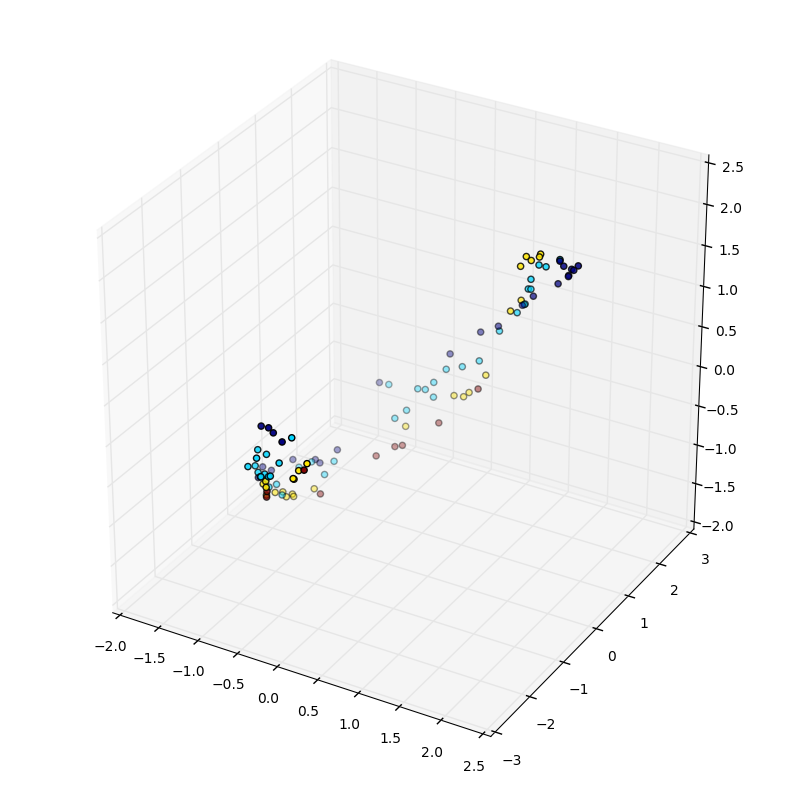

In [83]:
from sklearn.manifold import TSNE
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

model = TSNE(n_components=3, learning_rate=12, random_state=10)
X_tsne = model.fit_transform(XSG) 
plt.figure(figsize=(10,10))
ax = plt.subplot(111, projection='3d')
ax.scatter(X_tsne[:, 0], X_tsne[:, 1],X_tsne[:,2], c=kmeans_model.labels_)

In [84]:
#feature scaling
scaler = StandardScaler()
XSF_scaled = scaler.fit_transform(XSF)

In [85]:
XSF_scaled

array([[-1.44059253, -0.11655464, -0.9400691 , ...,  0.74845446,
        -0.31034479, -0.48354309],
       [-1.42488873,  1.56976784, -2.25000144, ..., -0.99452168,
         0.09758264, -1.02151642],
       [-1.41703683, -0.74892557,  0.69734634, ...,  0.31271042,
         0.09758264, -0.09927642],
       ..., 
       [ 1.83364936, -1.3812965 , -1.26755218, ...,  0.89370247,
         2.13721978,  0.45406757],
       [ 1.85720505,  2.20213877, -1.10381064, ..., -1.2850177 ,
        -0.85424803, -1.08299908],
       [ 1.92002024, -0.95971588, -1.75877681, ..., -1.13976969,
        -1.53412707, -1.32892975]])

##Finding K!

I'm going to use this code to measure the average distortion, for a variety of cluster sizes.  This function is a little tricky, don't worry, it won't be on a test!  You're certainly free to reuse it in your own work though.

In [86]:
def find_k (XSF, k_range, sample_percent=1):
    """
    k_range: a list of possible k values
    X, the data we're clustering on
    """
    from sklearn.cluster import KMeans
    import matplotlib.pyplot as plt
    import numpy as np
    from scipy.spatial.distance import cdist
    from sklearn.metrics import pairwise_distances

    N = XSF.shape[0]
    sampleSize = XSF.shape[0] * sample_percent

    if sampleSize > 0:
        index = np.arange(np.shape(XSF)[0])
        np.random.shuffle(index)
        XSF =  XSF[index, :]


    mean_distortions=[]
    for k in k_range:
        #cluster using k, then calculate the mean distortion (average distance to closest centroid)
        kmeans_model = KMeans(n_clusters=k, init='k-means++', n_jobs=-1).fit(XSF)
        mean_distortions.append(sum(np.min(pairwise_distances(XSF, kmeans_model.cluster_centers_,
                                                              metric='euclidean'),axis=1)) / XSF.shape[0])


    #visualize results
    plt.plot(k_range, mean_distortions)
    plt.xlabel("K Value")
    plt.ylabel("Mean Distortion")
    plt.title("Elbow Graph for Mean Distortion per K")
    plt.show()

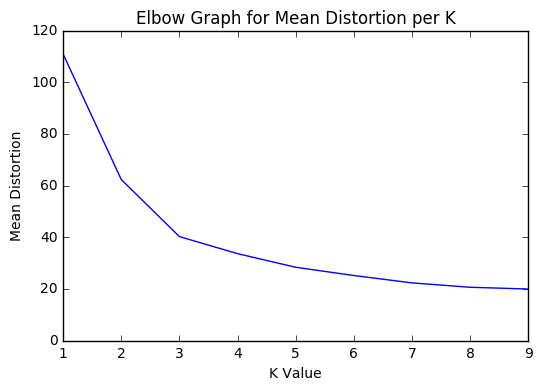

In [87]:
find_k(np.matrix(XSF), range(1,10),1)

From above, it appears that either 2 or 3 would be a good number of clusters.  

In this case, we will divide this into 3 clusters to give us a better understanding of who is a starter type of player, major role player, and bench player       

In [88]:
kmeans_model = KMeans(n_clusters=3, random_state=42)
kmeans_model.fit(XSF_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=42, tol=0.0001, verbose=0)

In [89]:
XSF['labels'] = kmeans_model.labels_

In [90]:
XSF.head(25)

,Rk,Age,G,GS,MP,FG,FGA,FGP,3P,3PA,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PPG,labels
9,10,26,11,8,24.4,1.9,7.2,0.266,0.8,4.0,...,0.9,5.5,6.5,1.7,1.4,0.7,1.5,1.4,5.5,1
11,12,34,3,0,9.3,0.7,2.7,0.250,0.7,2.0,...,0.7,0.3,1.0,0.7,0.0,0.0,0.3,1.7,2.0,0
12,13,23,21,2,19.9,2.7,7.2,0.377,0.7,2.7,...,1.2,2.7,3.9,0.9,0.8,0.5,1.2,1.7,8.0,1
16,17,32,22,22,33.7,8.2,18.9,0.436,2.0,6.0,...,1.0,5.0,6.0,2.5,1.0,0.4,1.9,2.9,22.4,2
17,18,31,22,22,33.4,4.5,10.1,0.444,2.7,7.1,...,0.8,4.2,5.0,2.0,2.0,0.3,0.9,1.7,12.6,1
21,22,27,19,11,15.9,1.5,4.4,0.337,1.0,3.1,...,0.3,1.6,1.8,0.5,0.4,0.1,0.4,1.2,4.2,0
26,27,24,21,21,37.3,8.2,18.1,0.453,1.0,3.1,...,1.5,4.2,5.7,1.2,0.8,0.2,1.5,1.8,20.4,2
27,28,36,21,4,25.5,2.6,7.1,0.360,1.2,4.0,...,1.0,3.9,4.9,2.8,0.8,0.4,1.8,2.6,7.2,1
33,34,27,22,22,27.0,4.0,11.0,0.358,1.2,4.0,...,0.6,2.6,3.2,2.6,1.6,0.6,1.9,2.3,10.7,1
36,37,28,20,0,15.9,3.6,6.8,0.522,0.3,0.7,...,0.7,2.9,3.6,0.8,0.5,0.2,1.2,1.6,8.6,1


In [91]:
XSF[XSF['labels'] == 3]

,Rk,Age,G,GS,MP,FG,FGA,FGP,3P,3PA,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PPG,labels


In [116]:
XSF

,Rk,Age,G,GS,MP,FG,FGA,FGP,3P,3PA,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PPG,labels
9,10,26,11,8,24.4,1.9,7.2,0.266,0.8,4.0,...,0.9,5.5,6.5,1.7,1.4,0.7,1.5,1.4,5.5,1
11,12,34,3,0,9.3,0.7,2.7,0.250,0.7,2.0,...,0.7,0.3,1.0,0.7,0.0,0.0,0.3,1.7,2.0,0
12,13,23,21,2,19.9,2.7,7.2,0.377,0.7,2.7,...,1.2,2.7,3.9,0.9,0.8,0.5,1.2,1.7,8.0,1
16,17,32,22,22,33.7,8.2,18.9,0.436,2.0,6.0,...,1.0,5.0,6.0,2.5,1.0,0.4,1.9,2.9,22.4,2
17,18,31,22,22,33.4,4.5,10.1,0.444,2.7,7.1,...,0.8,4.2,5.0,2.0,2.0,0.3,0.9,1.7,12.6,1
21,22,27,19,11,15.9,1.5,4.4,0.337,1.0,3.1,...,0.3,1.6,1.8,0.5,0.4,0.1,0.4,1.2,4.2,0
26,27,24,21,21,37.3,8.2,18.1,0.453,1.0,3.1,...,1.5,4.2,5.7,1.2,0.8,0.2,1.5,1.8,20.4,2
27,28,36,21,4,25.5,2.6,7.1,0.360,1.2,4.0,...,1.0,3.9,4.9,2.8,0.8,0.4,1.8,2.6,7.2,1
33,34,27,22,22,27.0,4.0,11.0,0.358,1.2,4.0,...,0.6,2.6,3.2,2.6,1.6,0.6,1.9,2.3,10.7,1
36,37,28,20,0,15.9,3.6,6.8,0.522,0.3,0.7,...,0.7,2.9,3.6,0.8,0.5,0.2,1.2,1.6,8.6,1


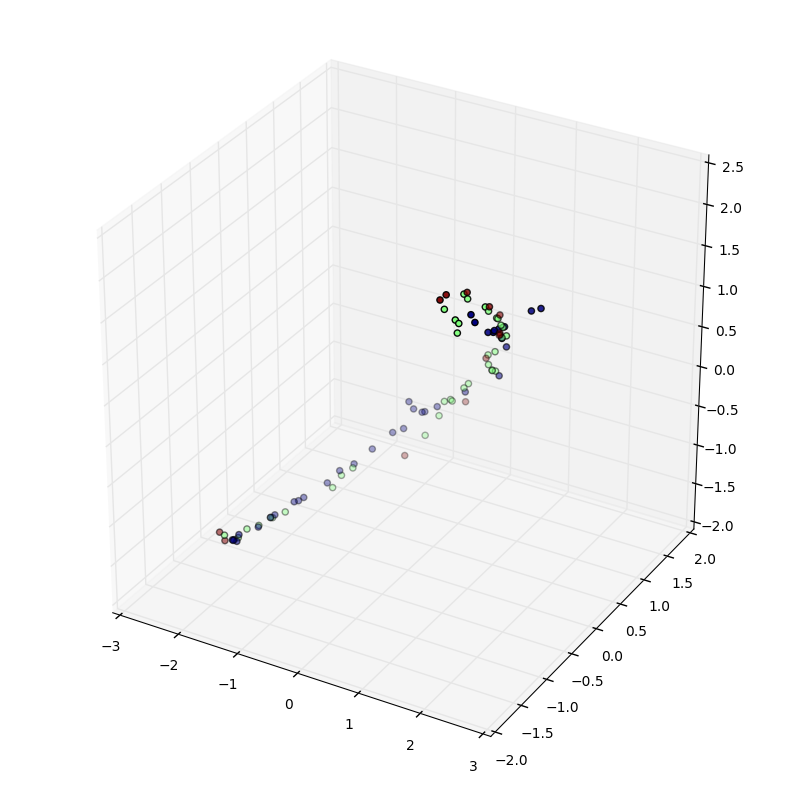

In [113]:
from sklearn.manifold import TSNE
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

model = TSNE(n_components=3, learning_rate=12, random_state=10)
X_tsne = model.fit_transform(XSF) 
plt.figure(figsize=(10,10))
ax = plt.subplot(111, projection='3d')
ax.scatter(X_tsne[:, 0], X_tsne[:, 1],X_tsne[:,2], c=kmeans_model.labels_)

In [122]:
#feature scaling
scaler = StandardScaler()
XPF_scaled = scaler.fit_transform(XPF)

In [123]:
XPF_scaled

array([[-1.88850266, -0.03983024, -1.45288354, ..., -0.96397318,
        -0.20651465, -0.87262659],
       [-1.84695663,  1.09650296,  0.69762058, ...,  0.96729151,
         0.57250451,  1.70638014],
       [-1.83864742,  0.1874364 ,  0.69762058, ..., -0.96397318,
        -0.42909156, -0.94377161],
       ..., 
       [ 1.65952835, -1.17616343, -2.16971824, ..., -1.44678935,
        -1.87584142, -1.26392417],
       [ 1.70107438,  0.41470304,  0.84098752, ...,  0.80635278,
        -0.0952262 ,  0.81706747],
       [ 1.70938358, -0.49436351,  0.4108867 , ..., -0.15927956,
         1.79667747,  0.60363243]])

##Finding K!

I'm going to use this code to measure the average distortion, for a variety of cluster sizes.  This function is a little tricky, don't worry, it won't be on a test!  You're certainly free to reuse it in your own work though.

In [124]:
def find_k (XPF, k_range, sample_percent=1):
    """
    k_range: a list of possible k values
    X, the data we're clustering on
    """
    from sklearn.cluster import KMeans
    import matplotlib.pyplot as plt
    import numpy as np
    from scipy.spatial.distance import cdist
    from sklearn.metrics import pairwise_distances

    N = XPF.shape[0]
    sampleSize = XPF.shape[0] * sample_percent

    if sampleSize > 0:
        index = np.arange(np.shape(XPF)[0])
        np.random.shuffle(index)
        XPF =  XPF[index, :]


    mean_distortions=[]
    for k in k_range:
        #cluster using k, then calculate the mean distortion (average distance to closest centroid)
        kmeans_model = KMeans(n_clusters=k, init='k-means++', n_jobs=-1).fit(XPF)
        mean_distortions.append(sum(np.min(pairwise_distances(XPF, kmeans_model.cluster_centers_,
                                                              metric='euclidean'),axis=1)) / XPF.shape[0])


    #visualize results
    plt.plot(k_range, mean_distortions)
    plt.xlabel("K Value")
    plt.ylabel("Mean Distortion")
    plt.title("Elbow Graph for Mean Distortion per K")
    plt.show()

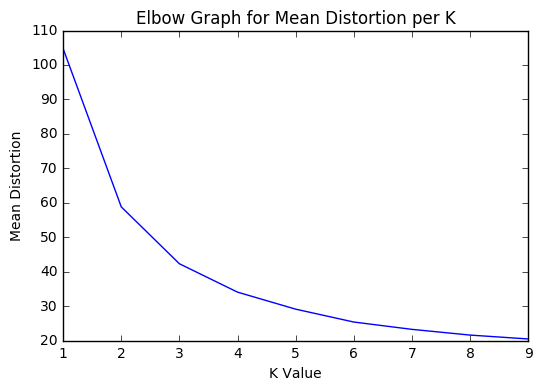

In [125]:
find_k(np.matrix(XPF), range(1,10),1)

From above, it appears that either 2 or 3 would be a good number of clusters.  

In this case, we will divide this into 3 clusters to give us a better understanding of who is a starter type of player, major role player, and bench player       

In [126]:
kmeans_model = KMeans(n_clusters=3, random_state=42)
kmeans_model.fit(XPF_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=42, tol=0.0001, verbose=0)

In [127]:
XPF['labels'] = kmeans_model.labels_

In [128]:
XPF.head(25)

,Rk,Age,G,GS,MP,FG,FGA,FGP,3P,3PA,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PPG,labels
1,2,26,6,0,8.0,0.8,2.8,0.294,0.2,1.2,...,0.3,1.0,1.3,0.0,0.0,0.0,0.3,1.5,2.2,2
6,7,31,21,21,32.9,6.5,13.9,0.466,0.5,1.0,...,1.8,4.7,6.5,1.7,0.8,1.1,1.5,2.2,16.7,0
7,8,27,21,0,14.6,0.8,2.5,0.321,0.0,0.0,...,1.3,1.5,2.8,1.2,0.3,0.3,0.3,1.3,1.8,1
14,15,28,22,22,30.7,4.3,10.7,0.403,2.5,6.1,...,1.8,3.6,5.4,1.1,0.4,0.1,1.0,1.9,12.9,0
18,19,28,10,1,14.7,2.0,4.5,0.444,1.1,2.3,...,0.4,1.9,2.3,1.1,0.2,0.3,1.2,2.1,5.3,1
29,30,31,12,0,8.9,1.5,2.8,0.529,0.1,0.1,...,0.5,0.9,1.4,0.4,0.1,0.2,0.3,0.8,3.6,1
39,40,19,17,0,12.1,1.2,3.0,0.392,0.6,1.9,...,0.2,1.4,1.6,0.4,0.2,0.4,0.7,1.2,3.0,1
40,41,23,14,1,10.6,1.7,3.9,0.436,0.6,2.2,...,1.0,2.2,3.2,0.6,0.3,0.0,0.4,0.6,5.0,1
41,42,24,18,1,10.9,1.2,2.6,0.447,0.8,2.0,...,0.3,0.8,1.1,0.4,0.1,0.5,0.3,1.0,3.4,1
44,45,28,22,1,16.8,2.5,5.8,0.422,1.2,3.4,...,0.5,2.8,3.3,1.1,0.7,0.3,1.0,2.0,7.0,1


In [129]:
XPF[XPF['labels'] == 3]

,Rk,Age,G,GS,MP,FG,FGA,FGP,3P,3PA,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PPG,labels


In [130]:
XPF

,Rk,Age,G,GS,MP,FG,FGA,FGP,3P,3PA,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PPG,labels
1,2,26,6,0,8.0,0.8,2.8,0.294,0.2,1.2,...,0.3,1.0,1.3,0.0,0.0,0.0,0.3,1.5,2.2,2
6,7,31,21,21,32.9,6.5,13.9,0.466,0.5,1.0,...,1.8,4.7,6.5,1.7,0.8,1.1,1.5,2.2,16.7,0
7,8,27,21,0,14.6,0.8,2.5,0.321,0.0,0.0,...,1.3,1.5,2.8,1.2,0.3,0.3,0.3,1.3,1.8,1
14,15,28,22,22,30.7,4.3,10.7,0.403,2.5,6.1,...,1.8,3.6,5.4,1.1,0.4,0.1,1.0,1.9,12.9,0
18,19,28,10,1,14.7,2.0,4.5,0.444,1.1,2.3,...,0.4,1.9,2.3,1.1,0.2,0.3,1.2,2.1,5.3,1
29,30,31,12,0,8.9,1.5,2.8,0.529,0.1,0.1,...,0.5,0.9,1.4,0.4,0.1,0.2,0.3,0.8,3.6,1
39,40,19,17,0,12.1,1.2,3.0,0.392,0.6,1.9,...,0.2,1.4,1.6,0.4,0.2,0.4,0.7,1.2,3.0,1
40,41,23,14,1,10.6,1.7,3.9,0.436,0.6,2.2,...,1.0,2.2,3.2,0.6,0.3,0.0,0.4,0.6,5.0,1
41,42,24,18,1,10.9,1.2,2.6,0.447,0.8,2.0,...,0.3,0.8,1.1,0.4,0.1,0.5,0.3,1.0,3.4,1
44,45,28,22,1,16.8,2.5,5.8,0.422,1.2,3.4,...,0.5,2.8,3.3,1.1,0.7,0.3,1.0,2.0,7.0,1


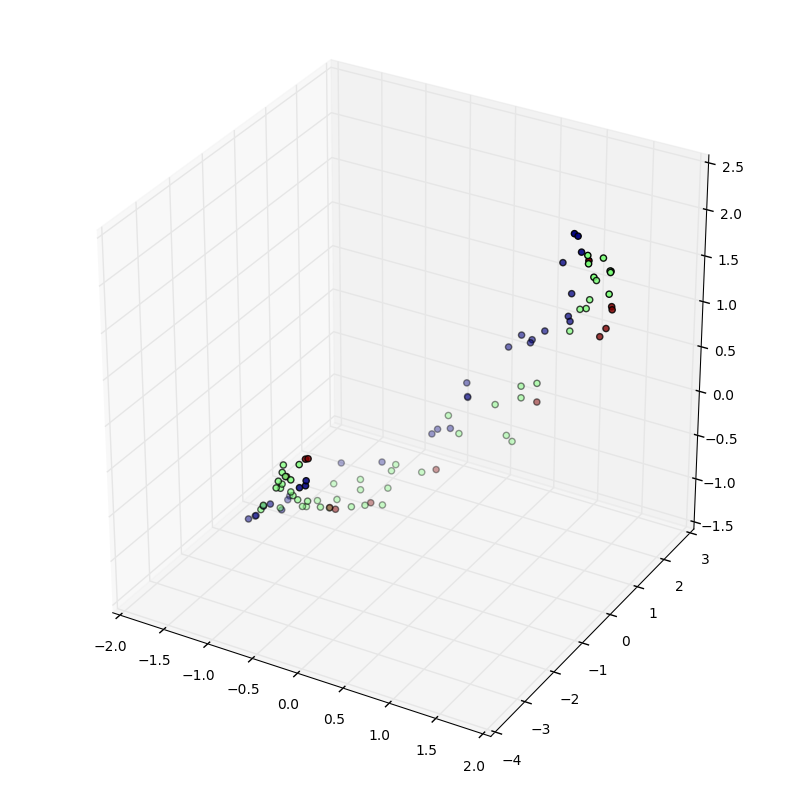

In [131]:
from sklearn.manifold import TSNE
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

model = TSNE(n_components=3, learning_rate=12, random_state=10)
X_tsne = model.fit_transform(XPF) 
plt.figure(figsize=(10,10))
ax = plt.subplot(111, projection='3d')
ax.scatter(X_tsne[:, 0], X_tsne[:, 1],X_tsne[:,2], c=kmeans_model.labels_)

In [132]:
#feature scaling
scaler = StandardScaler()
XC_scaled = scaler.fit_transform(XC)

In [133]:
XC_scaled

array([[-1.82839144, -0.84147318,  0.73317856, ...,  1.15850157,
         0.44367155,  0.58060923],
       [-1.81241027,  0.34088877, -0.85913488, ..., -0.81442843,
        -0.28578132, -0.60296723],
       [-1.80441968,  0.34088877,  0.73317856, ..., -1.09627558,
        -0.16420584, -0.81816294],
       ..., 
       [ 1.63153245,  0.10441638,  0.58842279, ..., -0.81442843,
        -0.65050776, -0.51330234],
       [ 1.63952304, -1.55089035, -2.16193679, ..., -1.51904629,
        -2.59571541, -1.17682248],
       [ 1.65550421, -1.78736274, -1.87242525, ..., -1.09627558,
        -0.77208323, -0.94369378]])

##Finding K!

I'm going to use this code to measure the average distortion, for a variety of cluster sizes.  This function is a little tricky, don't worry, it won't be on a test!  You're certainly free to reuse it in your own work though.

In [134]:
def find_k (XC, k_range, sample_percent=1):
    """
    k_range: a list of possible k values
    X, the data we're clustering on
    """
    from sklearn.cluster import KMeans
    import matplotlib.pyplot as plt
    import numpy as np
    from scipy.spatial.distance import cdist
    from sklearn.metrics import pairwise_distances

    N = XC.shape[0]
    sampleSize = XC.shape[0] * sample_percent

    if sampleSize > 0:
        index = np.arange(np.shape(XC)[0])
        np.random.shuffle(index)
        XC =  XC[index, :]


    mean_distortions=[]
    for k in k_range:
        #cluster using k, then calculate the mean distortion (average distance to closest centroid)
        kmeans_model = KMeans(n_clusters=k, init='k-means++', n_jobs=-1).fit(XC)
        mean_distortions.append(sum(np.min(pairwise_distances(XC, kmeans_model.cluster_centers_,
                                                              metric='euclidean'),axis=1)) / XC.shape[0])


    #visualize results
    plt.plot(k_range, mean_distortions)
    plt.xlabel("K Value")
    plt.ylabel("Mean Distortion")
    plt.title("Elbow Graph for Mean Distortion per K")
    plt.show()

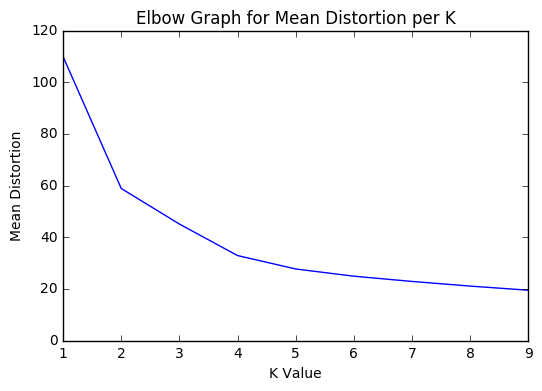

In [135]:
find_k(np.matrix(XC), range(1,10),1)

From above, it appears that 4 would be a good number of clusters.  

In this case, we will divide this into 4 clusters to give us a better understanding of who is a starter type of player, major role player, and bench player and reserve players     

In [136]:
kmeans_model = KMeans(n_clusters=4, random_state=42)
kmeans_model.fit(XC_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=42, tol=0.0001, verbose=0)

In [137]:
XC['labels'] = kmeans_model.labels_

In [138]:
XC.head(25)

,Rk,Age,G,GS,MP,FG,FGA,FGP,3P,3PA,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PPG,labels
2,3,23,22,22,30.2,4.3,7.7,0.553,0.0,0.0,...,2.8,4.9,7.7,0.6,1.2,0.9,1.9,2.5,10.8,1
4,5,28,11,1,13.0,1.9,4.1,0.467,0.0,0.1,...,1.0,2.7,3.7,0.1,0.1,0.6,0.5,1.9,4.2,0
5,6,28,22,0,13.0,1.3,2.3,0.560,0.0,0.0,...,1.3,2.7,4.0,0.5,0.7,0.6,0.3,2.0,3.0,0
10,11,38,9,0,8.8,0.8,2.0,0.389,0.0,0.3,...,0.9,1.7,2.6,0.6,0.3,0.4,0.6,1.3,2.4,0
19,20,30,23,18,18.0,1.3,2.6,0.517,0.0,0.0,...,1.7,4.6,6.3,0.6,0.2,0.3,0.5,1.7,3.6,0
32,33,30,24,1,16.5,1.6,3.7,0.432,0.0,0.0,...,1.1,3.3,4.4,0.4,0.4,0.4,1.1,2.1,4.6,0
43,44,24,22,7,25.8,1.9,4.1,0.451,0.0,0.0,...,2.4,6.0,8.4,1.1,0.2,1.4,1.5,2.6,5.5,1
45,46,25,23,0,15.4,2.2,4.4,0.500,0.0,0.0,...,2.3,2.9,5.2,0.6,0.3,0.6,0.7,2.4,5.9,0
48,49,32,16,16,25.0,1.8,3.8,0.475,0.0,0.1,...,2.6,7.8,10.4,2.2,0.6,0.9,1.8,3.6,3.8,1
67,68,22,22,22,25.8,5.5,8.8,0.632,0.0,0.0,...,2.5,6.0,8.5,0.9,0.5,1.9,1.3,2.6,12.0,1


In [139]:
XC[XC['labels'] == 3]

,Rk,Age,G,GS,MP,FG,FGA,FGP,3P,3PA,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PPG,labels
317,314,29,3,0,4.0,0.3,0.3,1.0,0.0,0.0,...,0.0,0.3,0.3,0.0,0.0,0.3,0.0,0.7,0.7,3
320,317,19,1,0,6.0,1.0,1.0,1.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,1.0,3.0,2.0,3
329,326,24,2,0,12.5,0.5,0.5,1.0,0.0,0.0,...,0.5,2.5,3.0,0.5,0.5,0.0,0.0,1.5,2.0,3
383,380,24,1,0,4.0,1.0,1.0,1.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,3
440,437,20,2,0,5.5,0.5,1.0,0.5,0.0,0.0,...,1.0,1.0,2.0,0.5,0.0,0.0,0.0,0.0,1.0,3


In [140]:
XC

,Rk,Age,G,GS,MP,FG,FGA,FGP,3P,3PA,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PPG,labels
2,3,23,22,22,30.2,4.3,7.7,0.553,0.0,0.0,...,2.8,4.9,7.7,0.6,1.2,0.9,1.9,2.5,10.8,1
4,5,28,11,1,13.0,1.9,4.1,0.467,0.0,0.1,...,1.0,2.7,3.7,0.1,0.1,0.6,0.5,1.9,4.2,0
5,6,28,22,0,13.0,1.3,2.3,0.560,0.0,0.0,...,1.3,2.7,4.0,0.5,0.7,0.6,0.3,2.0,3.0,0
10,11,38,9,0,8.8,0.8,2.0,0.389,0.0,0.3,...,0.9,1.7,2.6,0.6,0.3,0.4,0.6,1.3,2.4,0
19,20,30,23,18,18.0,1.3,2.6,0.517,0.0,0.0,...,1.7,4.6,6.3,0.6,0.2,0.3,0.5,1.7,3.6,0
32,33,30,24,1,16.5,1.6,3.7,0.432,0.0,0.0,...,1.1,3.3,4.4,0.4,0.4,0.4,1.1,2.1,4.6,0
43,44,24,22,7,25.8,1.9,4.1,0.451,0.0,0.0,...,2.4,6.0,8.4,1.1,0.2,1.4,1.5,2.6,5.5,1
45,46,25,23,0,15.4,2.2,4.4,0.500,0.0,0.0,...,2.3,2.9,5.2,0.6,0.3,0.6,0.7,2.4,5.9,0
48,49,32,16,16,25.0,1.8,3.8,0.475,0.0,0.1,...,2.6,7.8,10.4,2.2,0.6,0.9,1.8,3.6,3.8,1
67,68,22,22,22,25.8,5.5,8.8,0.632,0.0,0.0,...,2.5,6.0,8.5,0.9,0.5,1.9,1.3,2.6,12.0,1


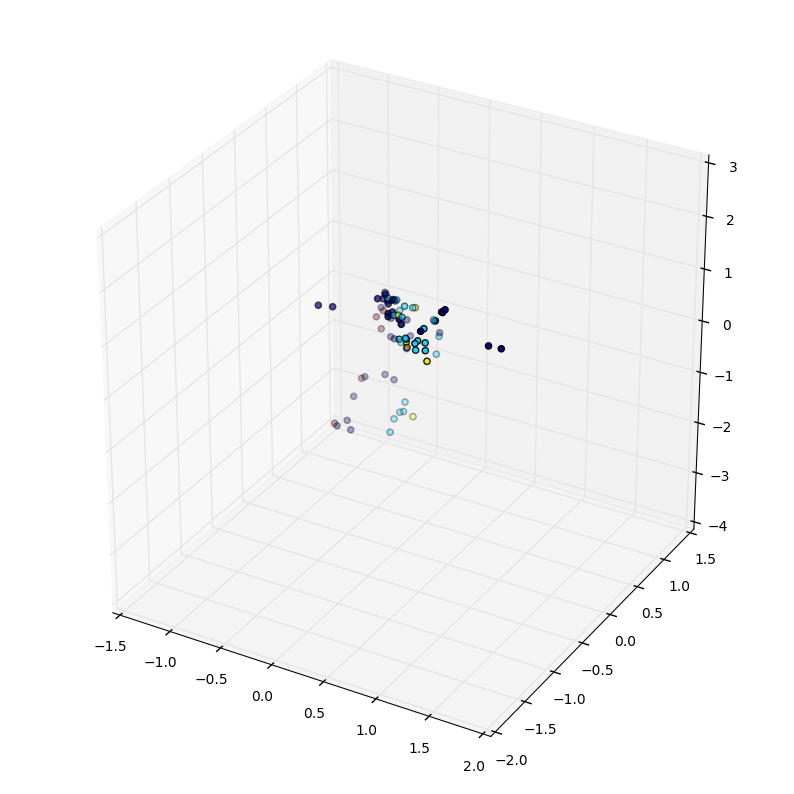

In [141]:
from sklearn.manifold import TSNE
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

model = TSNE(n_components=3, learning_rate=12, random_state=10)
X_tsne = model.fit_transform(XC) 
plt.figure(figsize=(10,10))
ax = plt.subplot(111, projection='3d')
ax.scatter(X_tsne[:, 0], X_tsne[:, 1],X_tsne[:,2], c=kmeans_model.labels_)

In [ ]:
XPG.to_csv("NBA_Playoff_Prediction_RandomForest_Results.csv", index=False)